In [57]:
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.la
from keras.preprocessing.text import Tokenizeryers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

SyntaxError: invalid syntax (<ipython-input-57-7d93f2488aec>, line 4)

In [ ]:
df = pd.read_csv("dataprep.csv")  

In [ ]:
df.head()

In [ ]:
df['Label'] = df.Label.map({'H':0, 'N':1})

In [ ]:
df.head()

In [ ]:
print(len(df['Label']))

In [ ]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['Statement'].values)
X = tokenizer.texts_to_sequences(df['Statement'].values)
X = pad_sequences(X)

In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.5))
model.add(LSTM(128,dropout=0.4, recurrent_dropout=0.4,return_sequences=True))
model.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(2,activation='sigmoid',kernel_initializer='glorot_normal'))
model.compile(loss = 'categorical_crossentropy', optimizer='Nadam',metrics = ['accuracy'])
print(model.summary())

In [ ]:
Y = pd.get_dummies(df['Label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [ ]:
X_val = X_train[:4072]
Y_val = Y_train[:4072]

In [ ]:
partial_X_train = X_train[4072:]
partial_Y_train = Y_train[4072:]

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X_val)
rescaledX = scaler.fit_transform(partial_X_train)

C:\Users\Tanvir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X_val)
rescaledX = scaler.transform(partial_X_train)

C:\Users\Tanvir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
batch_size = 64
history = model.fit(X_train, 
                    Y_train, 
                    epochs = 20, 
                    batch_size=batch_size, 
                    validation_data=(X_test, Y_test))

In [35]:
loss, accuracy = model.evaluate(X_val,Y_val , verbose=False)
print("Training Accuracy: {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(partial_X_train, partial_Y_train, verbose=False)
print("Testing Accuracy:  {:.2f}".format(accuracy))

Training Accuracy: 0.72
Testing Accuracy:  0.87


In [38]:
history = model.fit(X_test, 
                    Y_test, 
                    epochs = 20, 
                    batch_size=batch_size, 
                    validation_data=(X_val, Y_val))

Train on 6719 samples, validate on 500 samples
Epoch 1/20
6719/6719 [==============================] - 19s 3ms/step - loss: 0.4574 - acc: 0.7991 - val_loss: 0.5654 - val_acc: 0.7560
Epoch 2/20
6719/6719 [==============================] - 19s 3ms/step - loss: 0.4478 - acc: 0.8047 - val_loss: 0.6306 - val_acc: 0.7580
Epoch 3/20
6719/6719 [==============================] - 23s 3ms/step - loss: 0.4366 - acc: 0.8095 - val_loss: 0.6205 - val_acc: 0.7540
Epoch 4/20
6719/6719 [==============================] - 35s 5ms/step - loss: 0.4232 - acc: 0.8129 - val_loss: 0.6140 - val_acc: 0.7420
Epoch 5/20
6719/6719 [==============================] - 29s 4ms/step - loss: 0.4093 - acc: 0.8217 - val_loss: 0.6602 - val_acc: 0.7440
Epoch 6/20
6719/6719 [==============================] - 33s 5ms/step - loss: 0.3963 - acc: 0.8247 - val_loss: 0.7141 - val_acc: 0.7500
Epoch 7/20
6719/6719 [==============================] - 29s 4ms/step - loss: 0.3876 - acc: 0.8303 - val_loss: 0.6757 - val_acc: 0.7040
Epoch 8/

In [41]:
history = model.fit(X_train,Y_train, epochs=10, validation_split=0.2, shuffle=True)

Train on 10912 samples, validate on 2729 samples
Epoch 1/10
10912/10912 [==============================] - 96s 9ms/step - loss: 0.5136 - acc: 0.7639 - val_loss: 0.4833 - val_acc: 0.7779
Epoch 2/10
10912/10912 [==============================] - 90s 8ms/step - loss: 0.4673 - acc: 0.7896 - val_loss: 0.4858 - val_acc: 0.7768
Epoch 3/10
10912/10912 [==============================] - 92s 8ms/step - loss: 0.4327 - acc: 0.8065 - val_loss: 0.5086 - val_acc: 0.7765
Epoch 4/10
10912/10912 [==============================] - 93s 9ms/step - loss: 0.4058 - acc: 0.8218 - val_loss: 0.5401 - val_acc: 0.7695
Epoch 5/10
10912/10912 [==============================] - 101s 9ms/step - loss: 0.3880 - acc: 0.8288 - val_loss: 0.5368 - val_acc: 0.7534
Epoch 6/10
10912/10912 [==============================] - 92s 8ms/step - loss: 0.3736 - acc: 0.8346 - val_loss: 0.5959 - val_acc: 0.7523
Epoch 7/10
10912/10912 [==============================] - 92s 8ms/step - loss: 0.3581 - acc: 0.8418 - val_loss: 0.6056 - val_acc

In [43]:
model.test_on_batch(X_test, Y_test)
model.metrics_names

['loss', 'acc']

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


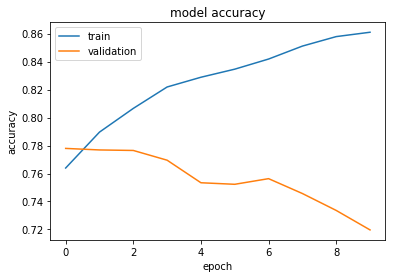

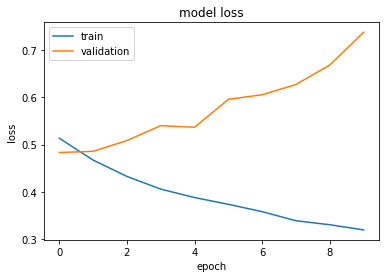

In [44]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [45]:
from keras.preprocessing.sequences import pad_sequences

vocab_size = 10000 # only consider the 10000 most frequent words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

x_train = pad_sequences(x_train, maxlen=500)  

ModuleNotFoundError: No module named 'keras.preprocessing.sequences'